In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import os
import random

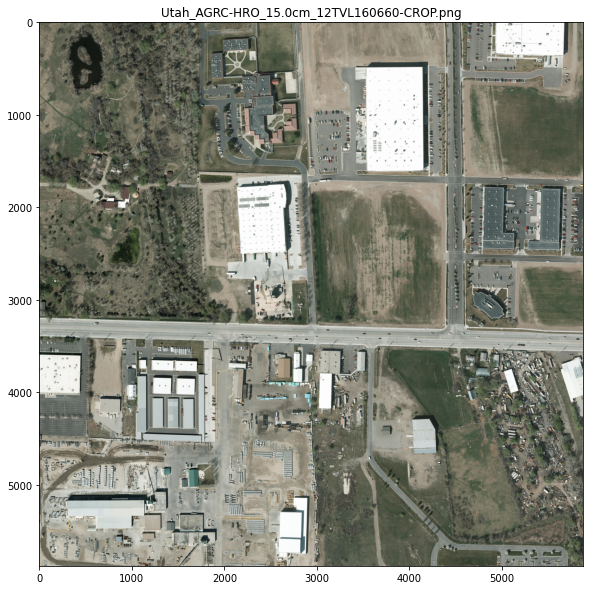

In [2]:
# load some image from data
image_path = random.choice(os.listdir("../data"))
img = np.asarray(Image.open(f"../data/{image_path}").convert("RGB"))
plt.figure(figsize=(10, 10))
plt.title(image_path)
plt.imshow(img)

In [3]:
def generate_random_gcps(img, num_samples, padding=(0, 0)):
    return np.random.randint(padding, 
                            high=(img.shape[0] - padding[0], img.shape[1] - padding[1]),
                            size=(num_samples, 2))

In [8]:
output_dim = (200, 200)
gcps = generate_random_gcps(img, 10, padding=output_dim)
gcps

array([[3482, 1996],
       [4656, 3974],
       [2773, 3321],
       [5561, 2560],
       [4784, 3643],
       [ 970, 4988],
       [ 622, 3251],
       [4587, 4602],
       [ 660,  318],
       [1515,  963]])

In [9]:
def crop_around(img, centers, dim):
    x = centers.T[1] - dim[1] // 2
    y = centers.T[0] - dim[0] // 2
    return [img[p[0]:p[0]+dim[0], p[1]:p[1]+dim[1]] for p in zip(y, x)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


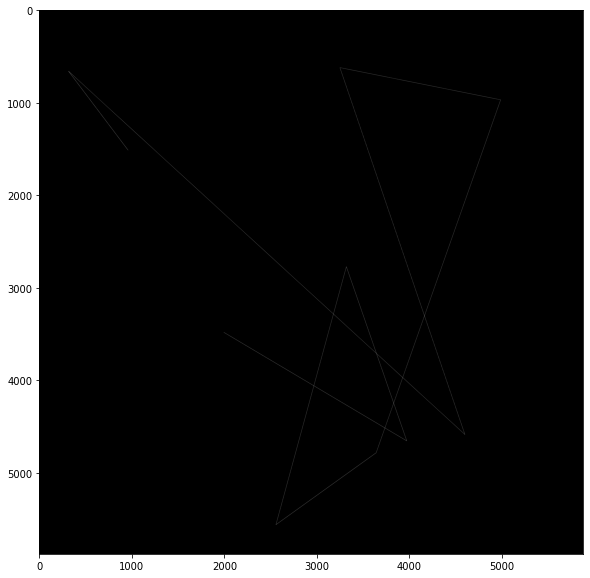

In [10]:
path_trace = np.zeros(img.shape)
path_imgs = []

for t1, t2 in zip(gcps, gcps[1:]):
    line = np.linspace(t1, t2, 10000, dtype="uint32")
    path_trace[line.T[0], line.T[1]] = np.array([255, 255, 255])
    path_imgs.extend(crop_around(img, line[::100], output_dim))

path_imgs = np.array(path_imgs)

plt.figure(figsize=(10, 10))
plt.imshow(path_trace)

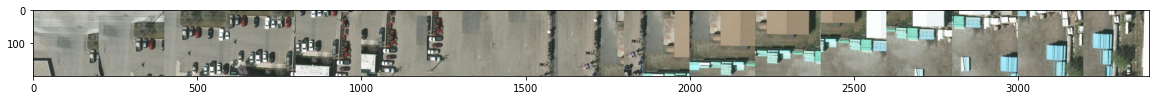

In [11]:
plt.figure(figsize=(20, 10))
plt.imshow(np.hstack(path_imgs[:50:3]))